# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

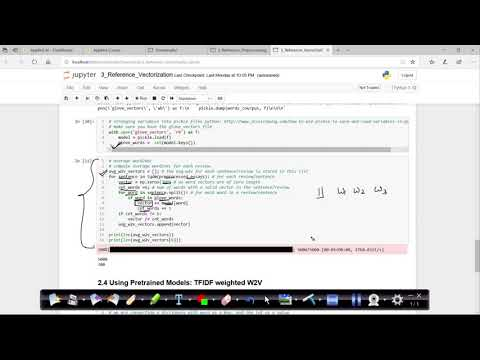

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [ ]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# **1. Decision Tree**

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2> Importing required libraries </h2>

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split  
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve, auc
import nltk
nltk.download('vader_lexicon')

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 1.1 Loading Data

In [6]:
data = pd.read_csv('/content/dt_preprocessed_data.csv',nrows=50000)                #loading dataset
data.head(5)

school_state  ...   price
0           ca  ...  725.05
1           ut  ...  213.03
2           ca  ...  329.00
3           ga  ...  481.04
4           wa  ...   17.74

[5 rows x 9 columns]

In [7]:
y = data['project_is_approved'].values                                           
X = data.drop(['project_is_approved'], axis=1)    

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(X_test.shape)

(40000, 8)
(10000, 8)


In [10]:
vectorizer_school_state = OneHotEncoder()
vectorizer_school_state.fit(X_train['school_state'].values.reshape(-1,1)) # fit has to applied only on train data


X_train_state = vectorizer_school_state.transform(X_train['school_state'].values.reshape(-1,1))
X_test_state = vectorizer_school_state.transform(X_test['school_state'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_state.shape, y_train.shape)

print(X_test_state.shape, y_test.shape)
#print(vectorizer_school_state.get_feature_names())
print(vectorizer_school_state.categories_)

After vectorizations
(40000, 51) (40000,)
(10000, 51) (10000,)
[array(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
       'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm',
       'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy'], dtype=object)]


In [11]:
vectorizer_teacher_prefix = OneHotEncoder()
vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values.reshape(-1,1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values.reshape(-1,1))
X_test_teacher_prefix = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_prefix.shape, y_train.shape)
print(X_test_teacher_prefix.shape, y_test.shape)
print(vectorizer_teacher_prefix.categories_)

After vectorizations
(40000, 5) (40000,)
(10000, 5) (10000,)
[array(['dr', 'mr', 'mrs', 'ms', 'teacher'], dtype=object)]


In [12]:
vectorizer_project_grade = OneHotEncoder()
vectorizer_project_grade.fit(X_train['project_grade_category'].values.reshape(-1,1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_grade = vectorizer_project_grade.transform(X_train['project_grade_category'].values.reshape(-1,1))
X_test_project_grade = vectorizer_project_grade.transform(X_test['project_grade_category'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_project_grade.shape, y_train.shape)
print(X_test_project_grade.shape, y_test.shape)
print(vectorizer_project_grade.categories_)

After vectorizations
(40000, 4) (40000,)
(10000, 4) (10000,)
[array(['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2'],
      dtype=object)]


In [13]:
vectorizer_clean_categories = OneHotEncoder(handle_unknown='ignore')
vectorizer_clean_categories.fit(X_train['clean_categories'].values.reshape(-1,1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories = vectorizer_clean_categories.transform(X_train['clean_categories'].values.reshape(-1,1))
X_test_clean_categories = vectorizer_clean_categories.transform(X_test['clean_categories'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_clean_categories.shape, y_train.shape)

print(X_test_clean_categories.shape, y_test.shape)
print(vectorizer_clean_categories.categories_)


After vectorizations
(40000, 45) (40000,)
(10000, 45) (10000,)
[array(['appliedlearning', 'appliedlearning health_sports',
       'appliedlearning history_civics',
       'appliedlearning literacy_language',
       'appliedlearning math_science', 'appliedlearning music_arts',
       'appliedlearning specialneeds', 'health_sports',
       'health_sports appliedlearning', 'health_sports history_civics',
       'health_sports literacy_language', 'health_sports math_science',
       'health_sports music_arts', 'health_sports specialneeds',
       'health_sports warmth care_hunger', 'history_civics',
       'history_civics appliedlearning', 'history_civics health_sports',
       'history_civics literacy_language', 'history_civics math_science',
       'history_civics music_arts', 'history_civics specialneeds',
       'history_civics warmth care_hunger', 'literacy_language',
       'literacy_language appliedlearning',
       'literacy_language health_sports',
       'literacy_language histor

In [14]:
vectorizer_clean_subcategories = OneHotEncoder(handle_unknown="ignore")
vectorizer_clean_subcategories.fit(X_train['clean_subcategories'].values.reshape(-1,1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories = vectorizer_clean_subcategories.transform(X_train['clean_subcategories'].values.reshape(-1,1))
X_test_clean_subcategories = vectorizer_clean_subcategories.transform(X_test['clean_subcategories'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_clean_subcategories.shape, y_train.shape)

print(X_test_clean_subcategories.shape, y_test.shape)
print(vectorizer_clean_subcategories.categories_)

After vectorizations
(40000, 351) (40000,)
(10000, 351) (10000,)
[array(['appliedsciences', 'appliedsciences charactereducation',
       'appliedsciences civics_government',
       'appliedsciences college_careerprep',
       'appliedsciences communityservice',
       'appliedsciences earlydevelopment', 'appliedsciences economics',
       'appliedsciences environmentalscience', 'appliedsciences esl',
       'appliedsciences extracurricular',
       'appliedsciences foreignlanguages', 'appliedsciences gym_fitness',
       'appliedsciences health_lifescience',
       'appliedsciences health_wellness',
       'appliedsciences history_geography', 'appliedsciences literacy',
       'appliedsciences literature_writing',
       'appliedsciences mathematics', 'appliedsciences music',
       'appliedsciences nutritioneducation', 'appliedsciences other',
       'appliedsciences parentinvolvement',
       'appliedsciences performingarts', 'appliedsciences socialsciences',
       'appliedsciences 

### **Normalizing numeric features**

In [15]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)

After vectorizations
(40000, 1) (40000,)
(10000, 1) (10000,)


In [16]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previous_posted_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous_posted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_previous_posted_norm.shape, y_train.shape)
print(X_test_previous_posted_norm.shape, y_test.shape)

After vectorizations
(40000, 1) (40000,)
(10000, 1) (10000,)


# **Implementing TfIdf on essay feature**

In [17]:
tfidf_vectorizer_essay = TfidfVectorizer(min_df=10)
tfidf_vectorizer_essay.fit(X_train['essay'].values)

x_train_essay = tfidf_vectorizer_essay.transform(X_train['essay'].values)
x_test_essay = tfidf_vectorizer_essay.transform(X_test['essay'].values)

print("After vectorizations")
print(x_train_essay.shape, y_train.shape)
print(x_test_essay.shape, y_test.shape)

After vectorizations
(40000, 11108) (40000,)
(10000, 11108) (10000,)


# **Sentiment scores(preprocessed_essay)**

In [18]:
train_essays = []                                                               # list that takes all the polarities of 'essay' from train set
test_essays = []                                                                # list that takes all the polarities of 'essay' from test set
sia = SentimentIntensityAnalyzer()
tr_essays = X_train['essay'].values                                             # is a ndarray which has all the values of essay from train set                                         
te_essays = X_test['essay'].values                                              # is a ndarray which has all the values of essay from test set
for i in range(tr_essays.shape[0]):
  tr_pol = sia.polarity_scores(tr_essays[i])
  train_essays.append(tr_pol.values())
for j in range(te_essays.shape[0]):
  te_pol = sia.polarity_scores(te_essays[j])
  test_essays.append(te_pol.values())


tr_essay_df = pd.DataFrame(train_essays,columns=tr_pol.keys())                  #tr_essay is the df which has all the polarities of essay
te_essay_df = pd.DataFrame(test_essays,columns=te_pol.keys())                   #tr_essay is the df which has all the polarities of essay
print('Sentiment scores of \'essay\' feature of train data \n')
print(tr_essay_df.head(),"\n")
print('Sentiment scores of \'essay\' feature of test data \n')
print(te_essay_df.head())  


Sentiment scores of 'essay' feature of train data 

     neg    neu    pos  compound
0  0.000  0.724  0.276    0.9882
1  0.013  0.799  0.188    0.9576
2  0.123  0.553  0.324    0.9874
3  0.035  0.714  0.252    0.9943
4  0.025  0.781  0.194    0.9845 

Sentiment scores of 'essay' feature of test data 

     neg    neu    pos  compound
0  0.039  0.669  0.291    0.9858
1  0.067  0.678  0.255    0.9911
2  0.080  0.757  0.163    0.9578
3  0.082  0.662  0.256    0.9899
4  0.096  0.682  0.222    0.9800


# **Stacking**

In [19]:
from scipy.sparse import hstack
X_tr = hstack((x_train_essay, X_train_state, X_train_teacher_prefix, X_train_project_grade,X_train_clean_categories,X_train_clean_subcategories, X_train_price_norm,X_train_previous_posted_norm,tr_essay_df)).tocsr()
X_te = hstack((x_test_essay, X_test_state, X_test_teacher_prefix, X_test_project_grade,X_test_clean_categories,X_test_clean_subcategories, X_test_price_norm,X_test_previous_posted_norm,te_essay_df)).tocsr()

print("Final Data matrix")                                        
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(40000, 11570) (40000,)
(10000, 11570) (10000,)


# **Step-2**

<h2>Hyper Parameter tuning using GridSearchCV</h2>

In [20]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}

#Dt classifier for hyper parameter tuning 
clf_dt=DecisionTreeClassifier(max_features=1000)

gridsearch = GridSearchCV(clf_dt,params,scoring='roc_auc',cv=10,return_train_score=True)
gridsearch.fit(X_tr,y_train)

gsout=pd.DataFrame(gridsearch.cv_results_)
#Sorting values W.R.T test score rank
gsout=gsout.sort_values('rank_test_score')
gsout

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
11       0.660716      0.011984  ...          0.637129         0.006821
10       0.733165      0.025619  ...          0.649615         0.006381
8        0.777785      0.039551  ...          0.652006         0.007544
9        0.765106      0.026678  ...          0.641396         0.007270
4        0.371867      0.015256  ...          0.595987         0.009436
5        0.377023      0.020241  ...          0.596982         0.009031
6        0.362012      0.024721  ...          0.592917         0.006409
15       3.013827      0.158362  ...          0.804413         0.016824
7        0.357764      0.012853  ...          0.592333         0.013710
14       3.705293      0.169907  ...          0.854107         0.017210
13       4.236682      0.134162  ...          0.882401         0.007492
3        0.152917      0.008907  ...          0.527979         0.010920
1        0.149887      0.007907  ...          0.525895         0.009734
12       4.499293      0.188588  ...          0.897678         0.012175
0        0.152249      0.004374  ...          0.528219         0.015473
2        0.149753      0.005993  ...          0.522678         0.006668

[16 rows x 32 columns]

# **Step- 3**

<h2>Plotting performance using heatmap</h2>

In [29]:
tr_ht=gsout.loc[:,['param_min_samples_split','param_max_depth','mean_train_score']]
te_ht=gsout.loc[:,['param_min_samples_split','param_max_depth','mean_test_score']]

In [30]:
tr_ht = tr_ht.pivot('param_min_samples_split','param_max_depth','mean_train_score')

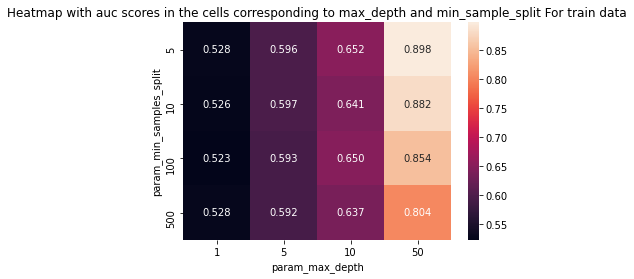

In [31]:
tr_ht_plot = sns.heatmap(tr_ht,annot=True,fmt='.3f')
plt.title('Heatmap with auc scores in the cells corresponding to max_depth and min_sample_split For train data')

plt.show()

In [32]:
te_ht = te_ht.pivot('param_min_samples_split','param_max_depth','mean_test_score')

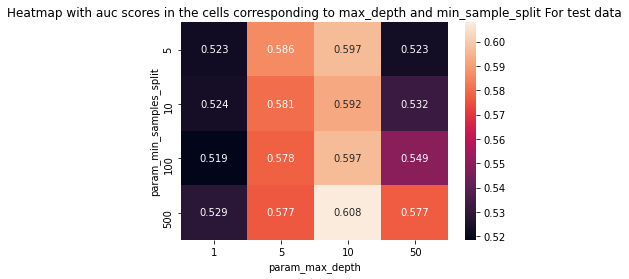

In [33]:
te_ht_plot = sns.heatmap(te_ht,annot=True,fmt='.3f')
plt.title('Heatmap with auc scores in the cells corresponding to max_depth and min_sample_split For test data')

plt.show()

### **Modeling**

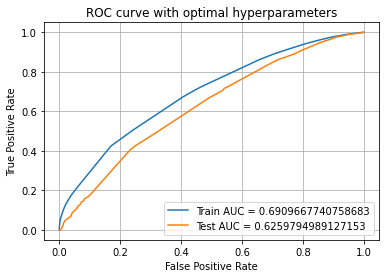

In [34]:
#Creating Decision tree classifier model with best hyper parameters
DT =DecisionTreeClassifier(max_depth=gridsearch.best_params_['max_depth'],min_samples_split=gridsearch.best_params_['min_samples_split'],class_weight="balanced")

#fitting train data to model
DT.fit(X_tr,y_train)

#Plotting ROC
train_fpr_val, train_tpr_val, train_thresholds_val = roc_curve(y_train, DT.predict_proba(X_tr)[:, 1])
test_fpr_val, test_tpr_val, test_thresholds = roc_curve(y_test, DT.predict_proba(X_te)[:, 1])
plt.plot(train_fpr_val, train_tpr_val, label="Train AUC = " + str(auc(train_fpr_val, train_tpr_val)))                  
plt.plot(test_fpr_val, test_tpr_val, label="Test AUC = " + str(auc(test_fpr_val, test_tpr_val)))
plt.legend()
plt.grid()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve with optimal hyperparameters")
plt.show()

### **Confusion Matrix**

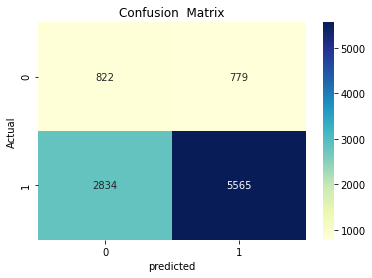

In [54]:
#reference : https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

y_pred = DT.predict(X_te)
con_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(con_matrix, annot=True,fmt="d", cmap="YlGnBu")
plt.title('Confusion  Matrix')                                           
plt.xlabel('predicted')
plt.ylabel('Actual')

plt.show()

# **Word Cloud**

In [36]:
WordCloud = X_test[['price','essay','teacher_number_of_previously_posted_projects']]    # Taking price,essay,teacher_number_of_previously_posted_projects attributes
WordCloud['y_actual'] = y_test
WordCloud['y_predicted'] = y_pred
WordCloud

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



price  ... y_predicted
47615   452.28  ...           0
16670   662.68  ...           0
12221  1059.56  ...           1
42712   196.64  ...           1
20304    56.16  ...           0
...        ...  ...         ...
19629     5.01  ...           1
18883   339.27  ...           0
9489    795.95  ...           1
37237   399.99  ...           1
46801    41.28  ...           0

[10000 rows x 5 columns]

In [37]:
FPS_of_WordCloud = WordCloud[(WordCloud['y_actual']==0) & (WordCloud['y_predicted']==1)]
print('There are',len(FPS_of_WordCloud),'False positive data points')
FPS_of_WordCloud

There are 779 False positive data points


price  ... y_predicted
11754  459.88  ...           1
7827   976.60  ...           1
43245  229.36  ...           1
6030   819.73  ...           1
30476  430.29  ...           1
...       ...  ...         ...
35147  457.23  ...           1
29892  358.23  ...           1
24664  365.31  ...           1
41643  281.09  ...           1
15688  544.13  ...           1

[779 rows x 5 columns]

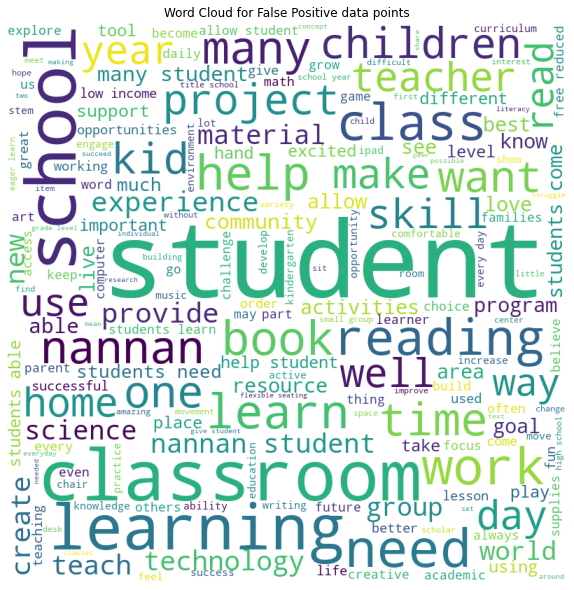

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in FPS_of_WordCloud['essay']:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title('Word Cloud for False Positive data points')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### **Box plot**

In [39]:
sns.boxplot(y='price',data=FPS_of_WordCloud)
plt.title("Box plot with the \'price\' of these False negative points")
plt.figure(figsize = (8, 8), facecolor = None)
plt.show()

<Figure size 576x576 with 0 Axes>

### **PDF**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



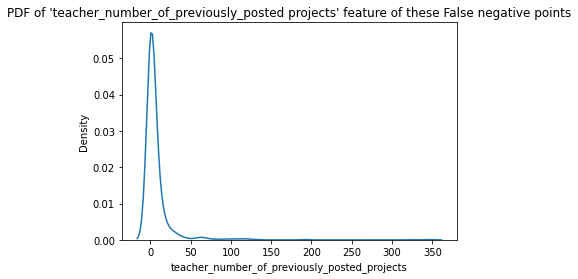

In [40]:
#Ref: https://seaborn.pydata.org/generated/seaborn.distplot.html

sns.distplot(a=FPS_of_WordCloud['teacher_number_of_previously_posted_projects'],kde=True,hist=False)
plt.title('PDF of \'teacher_number_of_previously_posted projects\' feature of these False negative points')
plt.show()

# **Set 2 : Computing TFIDF W2V for text features (preprocessed_essay)**

In [41]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_words = set(tfidf.get_feature_names())

In [42]:
#This code is directly taken from the above given instructions
#please use below code to load glove vectors
import pickle 
with open('/content/glove_vectors (1)', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [43]:
#This code is directly taken from reference notebook
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_train['essay']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors.append(vector)

print(len(train_tfidf_w2v_vectors))
print(len(train_tfidf_w2v_vectors[0]))

40000
300


In [44]:
#This code is directly taken from reference notebook
# average Word2Vec
# compute average word2vec for each review.
test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_test['essay']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors.append(vector)

print(len(test_tfidf_w2v_vectors))
print(len(test_tfidf_w2v_vectors[0]))

10000
300


###**Stacking**

In [45]:
w2v_X_tr = hstack((train_tfidf_w2v_vectors, X_train_state, X_train_teacher_prefix, X_train_project_grade,X_train_clean_categories,X_train_clean_subcategories, X_train_price_norm,X_train_previous_posted_norm,tr_essay_df)).tocsr()
w2v_X_te = hstack((test_tfidf_w2v_vectors, X_test_state, X_test_teacher_prefix, X_test_project_grade,X_test_clean_categories,X_test_clean_subcategories, X_test_price_norm,X_test_previous_posted_norm,te_essay_df)).tocsr()

print("Final Data matrix")                                        
print(w2v_X_tr.shape, y_train.shape)
print(w2v_X_te.shape, y_test.shape)

Final Data matrix
(40000, 762) (40000,)
(10000, 762) (10000,)


# **Step-2 for set-2**

<h2>Hyper parameter tuning GridSearchCV</h2>

In [46]:
#Dt classifier for hyper parameter tuning 
clf_dt1=DecisionTreeClassifier(max_features=500)

gridsearch1 = GridSearchCV(clf_dt1,params,scoring='roc_auc',cv=10,return_train_score=True)
gridsearch1.fit(w2v_X_tr,y_train)

gsout1=pd.DataFrame(gridsearch1.cv_results_)
#sorting values w.r.t test score rank
gsout1=gsout1.sort_values('rank_test_score')
gsout1

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
7        6.704808      0.115454  ...          0.645288         0.002402
4        6.835775      0.098489  ...          0.646222         0.001884
11      13.929262      0.220992  ...          0.706570         0.003548
6        6.805585      0.084557  ...          0.644709         0.002579
5        6.791981      0.091353  ...          0.645232         0.001683
15      31.541489      2.097841  ...          0.778347         0.006176
10      17.377069      0.512894  ...          0.738774         0.004295
8       18.206218      0.576026  ...          0.767265         0.004374
9       17.882645      0.428186  ...          0.762646         0.006121
14      59.703105      2.212845  ...          0.921915         0.003014
0        1.450014      0.047888  ...          0.558730         0.002173
2        1.451501      0.029307  ...          0.559486         0.001087
3        1.474792      0.038524  ...          0.559302         0.000979
1        1.442625      0.038866  ...          0.558286         0.002823
13      64.223362      1.940540  ...          0.995237         0.000310
12      65.190875      1.825293  ...          0.999159         0.000185

[16 rows x 32 columns]

# **Step-3 for set-2**

<h2>Plotting performance using Heatmap</h2>

In [47]:
tr_ht1=gsout1.loc[:,['param_min_samples_split','param_max_depth','mean_train_score']]
te_ht1=gsout1.loc[:,['param_min_samples_split','param_max_depth','mean_test_score']]

In [48]:
tr_ht1 = tr_ht1.pivot('param_min_samples_split','param_max_depth','mean_train_score')

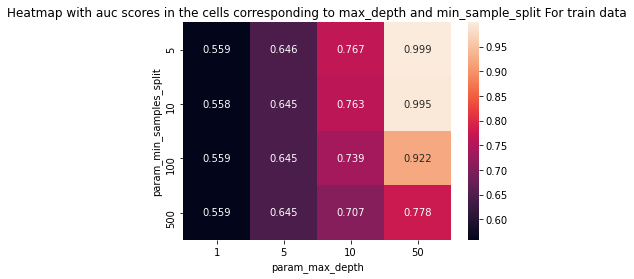

In [49]:
tr_ht_plot1 = sns.heatmap(tr_ht1,annot=True,fmt='.3f')
plt.title('Heatmap with auc scores in the cells corresponding to max_depth and min_sample_split For train data')

plt.show()

In [50]:
te_ht1 = te_ht1.pivot('param_min_samples_split','param_max_depth','mean_test_score')

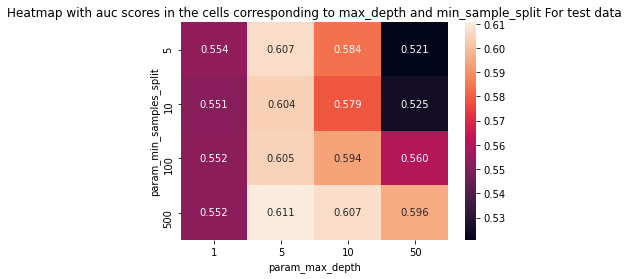

In [51]:
te_ht_plot1 = sns.heatmap(te_ht1,annot=True,fmt='.3f')
plt.title('Heatmap with auc scores in the cells corresponding to max_depth and min_sample_split For test data')

plt.show()

### **Modeling**

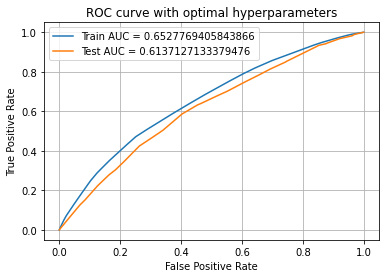

In [52]:
#Creating Decision tree classifier model with best hyper parameters
DT1 =DecisionTreeClassifier(max_depth=gridsearch1.best_params_['max_depth'],min_samples_split=gridsearch1.best_params_['min_samples_split'],class_weight="balanced")

#fitting train data to model
DT1.fit(w2v_X_tr,y_train)

#Plotting ROC
train_fpr_val1, train_tpr_val1, train_thresholds_val = roc_curve(y_train, DT1.predict_proba(w2v_X_tr)[:,1])
test_fpr_val1, test_tpr_val1, test_thresholds = roc_curve(y_test, DT1.predict_proba(w2v_X_te)[:,1])
plt.plot(train_fpr_val1, train_tpr_val1, label="Train AUC = " + str(auc(train_fpr_val1, train_tpr_val1)))                  
plt.plot(test_fpr_val1, test_tpr_val1, label="Test AUC = " + str(auc(test_fpr_val1, test_tpr_val1)))
plt.legend()
plt.grid()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve with optimal hyperparameters")
plt.show()

### **Confusion Matrix**




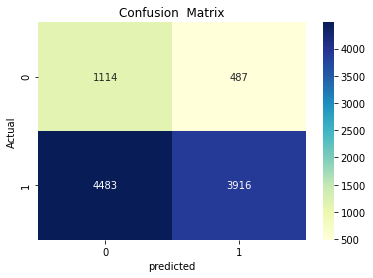

In [55]:
y_pred1 = DT1.predict(w2v_X_te)
con_matrix1 = confusion_matrix(y_test,y_pred1)
sns.heatmap(con_matrix1, annot=True,fmt="d", cmap="YlGnBu")
plt.title('Confusion  Matrix')                                           
plt.xlabel('predicted')
plt.ylabel('Actual')

plt.show()


# **Word Cloud**

In [56]:
WordCloud1 = X_test[['price','essay','teacher_number_of_previously_posted_projects']]    # Taking price,essay,teacher_number_of_previously_posted_projects attributes
WordCloud1['y_actual'] = y_test
WordCloud1['y_predicted'] = y_pred1
WordCloud1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



price  ... y_predicted
47615   452.28  ...           0
16670   662.68  ...           0
12221  1059.56  ...           0
42712   196.64  ...           0
20304    56.16  ...           0
...        ...  ...         ...
19629     5.01  ...           0
18883   339.27  ...           1
9489    795.95  ...           0
37237   399.99  ...           1
46801    41.28  ...           0

[10000 rows x 5 columns]

In [57]:
FPS_of_WordCloud1 = WordCloud1[(WordCloud1['y_actual']==0) & (WordCloud1['y_predicted']==1)]
print('There are',len(FPS_of_WordCloud1),'False positive data points')
FPS_of_WordCloud1

There are 487 False positive data points


price  ... y_predicted
43245  229.36  ...           1
6030   819.73  ...           1
42557  120.66  ...           1
42054  430.64  ...           1
31232  378.94  ...           1
...       ...  ...         ...
16797   48.72  ...           1
47991   52.95  ...           1
33182  180.32  ...           1
35147  457.23  ...           1
15688  544.13  ...           1

[487 rows x 5 columns]

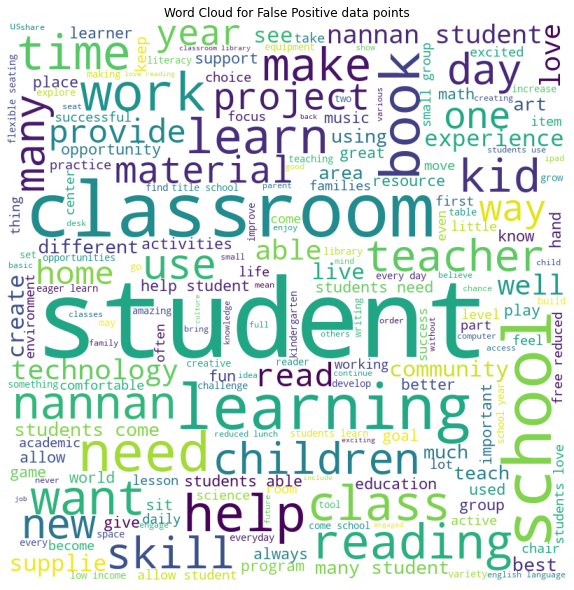

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val1 in FPS_of_WordCloud1['essay']:
      
    # typecaste each val to string
    val1 = str(val1)
  
    # split the value
    tokens1 = val1.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens1)):
        tokens1[i] = tokens1[i].lower()
      
    comment_words += " ".join(tokens1)+" "
  
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud1)
plt.title('Word Cloud for False Positive data points')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### **Box Plot**

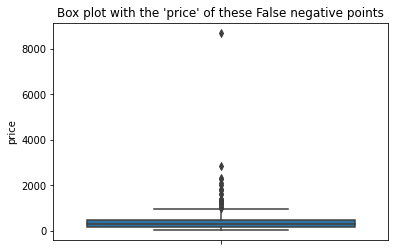

<Figure size 576x576 with 0 Axes>

In [58]:
sns.boxplot(y='price',data=FPS_of_WordCloud1)
plt.title("Box plot with the \'price\' of these False negative points")
plt.figure(figsize = (8, 8), facecolor = None)
plt.show()

### **PDF**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



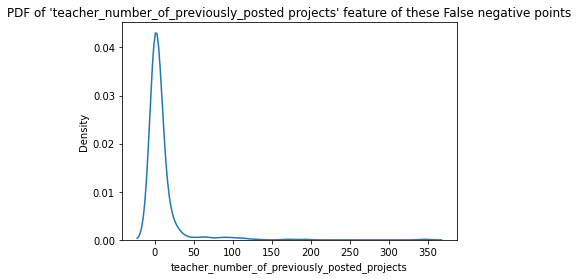

In [59]:
sns.distplot(a=FPS_of_WordCloud1['teacher_number_of_previously_posted_projects'],kde=True,hist=False)
plt.title('PDF of \'teacher_number_of_previously_posted projects\' feature of these False negative points')
plt.show()

# **Task-2**

## **2. Decision Tree**

In [60]:
dt_clf1 = DecisionTreeClassifier(max_features=1000)
dt_clf1.fit(X_tr,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1000, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Extracting features whose feature importance is more than zero**

In [61]:
featimp = list(dt_clf1.feature_importances_)

features = enumerate(featimp)
all_feature_imp_values = dict(features)
non_zero_featimp={key:value for key,value in all_feature_imp_values.items() if value!=0}

In [62]:
non_zero_featimp.items()
print(len(non_zero_featimp),'number of features have feature importance more than zero')

2482 number of features have feature importance more than zero


In [63]:
featimp_tr = X_tr[:,list(non_zero_featimp.keys())]
featimp_te = X_te[:,list(non_zero_featimp.keys())]

print(featimp_tr.shape)
print(featimp_te.shape)

(40000, 2482)
(10000, 2482)


# **Step-2**

<h2>Hyper Parameter tuning using GridSearchCV</h2>

In [64]:
#Dt classifier for hyper parameter tuning 
dt_clf2 = DecisionTreeClassifier(max_features=1000)

gridsearch2 = GridSearchCV(dt_clf2, params,scoring='roc_auc',cv=10,return_train_score=True)

gridsearch2.fit(featimp_tr,y_train)

gsout2=pd.DataFrame(gridsearch2.cv_results_)
#sorting values w.r.t test score rank
gsout2=gsout2.sort_values('rank_test_score')
gsout2

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
11       2.056928      0.048700  ...          0.661417         0.003420
10       2.238977      0.062247  ...          0.666219         0.006751
9        2.396836      0.060476  ...          0.675626         0.003209
7        0.995956      0.027530  ...          0.618177         0.005157
6        0.993813      0.033091  ...          0.617773         0.008058
8        2.440716      0.048982  ...          0.679512         0.004886
5        1.024155      0.025196  ...          0.615911         0.005194
4        1.019104      0.032837  ...          0.618220         0.005909
15       9.254279      0.365089  ...          0.794624         0.011800
14      11.539996      0.336664  ...          0.849593         0.013290
2        0.240064      0.010212  ...          0.545324         0.009061
1        0.239724      0.008054  ...          0.545866         0.012528
3        0.236912      0.013879  ...          0.541988         0.014416
0        0.244305      0.012783  ...          0.542814         0.011052
13      13.024359      0.305206  ...          0.902224         0.007148
12      13.180909      0.365230  ...          0.907399         0.008331

[16 rows x 32 columns]

### **Step-3 for task 2**

<h2>Plotting performance using Heatmap</h2>

In [65]:
tr_ht2=gsout2.loc[:,['param_min_samples_split','param_max_depth','mean_train_score']]
te_ht2=gsout2.loc[:,['param_min_samples_split','param_max_depth','mean_test_score']]

In [66]:
tr_ht2 = tr_ht2.pivot('param_min_samples_split','param_max_depth','mean_train_score')

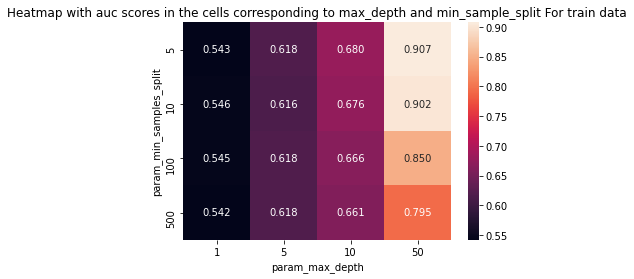

In [67]:
tr_ht_plot2 = sns.heatmap(tr_ht2,annot=True,fmt='.3f')
plt.title('Heatmap with auc scores in the cells corresponding to max_depth and min_sample_split For train data')

plt.show()


In [68]:
te_ht2 = te_ht2.pivot('param_min_samples_split','param_max_depth','mean_test_score')

In [69]:
te_ht_plot2 = sns.heatmap(te_ht2,annot=True,fmt='.3f')
plt.title('Heatmap with auc scores in the cells corresponding to max_depth and min_sample_split For test data')

plt.show()

### **Modeling**

In [70]:
dt_model = DecisionTreeClassifier(max_depth=gridsearch2.best_params_['max_depth'],min_samples_split=gridsearch2.best_params_['min_samples_split'],class_weight="balanced")
dt_model.fit(featimp_tr,y_train)


dt_train_fpr_val, dt_train_tpr_val, dt_train_thresholds_val = roc_curve(y_train, dt_model.predict_proba(featimp_tr)[:, 1])
dt_test_fpr_val, dt_test_tpr_val, dt_test_thresholds = roc_curve(y_test, dt_model.predict_proba(featimp_te)[:, 1])

plt.plot(dt_train_fpr_val, dt_train_tpr_val, label="Train AUC = " + str(auc(dt_train_fpr_val, dt_train_tpr_val)))                  
plt.plot(dt_test_fpr_val, dt_test_tpr_val, label="Test AUC = " + str(auc(dt_test_fpr_val, dt_test_tpr_val)))
plt.legend()
plt.grid()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve with optimal hyperparameters")
plt.show()

### **Confusion Matrix**

In [71]:
dt_y_pred = dt_model.predict(featimp_te)
dt_con_matrix = confusion_matrix(y_test,dt_y_pred)
sns.heatmap(dt_con_matrix, annot=True,fmt="d", cmap="YlGnBu")
plt.title('Confusion  Matrix')                                           
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

# **Word Cloud**

In [72]:
dt_WordCloud = X_test[['price','essay','teacher_number_of_previously_posted_projects']]   
dt_WordCloud['y_actual'] = y_test
dt_WordCloud['y_predicted'] = dt_y_pred
dt_WordCloud

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



price  ... y_predicted
47615   452.28  ...           0
16670   662.68  ...           0
12221  1059.56  ...           1
42712   196.64  ...           0
20304    56.16  ...           0
...        ...  ...         ...
19629     5.01  ...           1
18883   339.27  ...           0
9489    795.95  ...           1
37237   399.99  ...           1
46801    41.28  ...           0

[10000 rows x 5 columns]

In [73]:
FPS_of_dt_WordCloud = dt_WordCloud[(dt_WordCloud['y_actual']==0) & (dt_WordCloud['y_predicted']==1)]
print('There are',len(FPS_of_dt_WordCloud),'False positive data points')
FPS_of_dt_WordCloud

There are 743 False positive data points


price  ... y_predicted
11754  459.88  ...           1
7827   976.60  ...           1
43245  229.36  ...           1
6030   819.73  ...           1
30476  430.29  ...           1
...       ...  ...         ...
35147  457.23  ...           1
11372   91.08  ...           1
29892  358.23  ...           1
24664  365.31  ...           1
41643  281.09  ...           1

[743 rows x 5 columns]

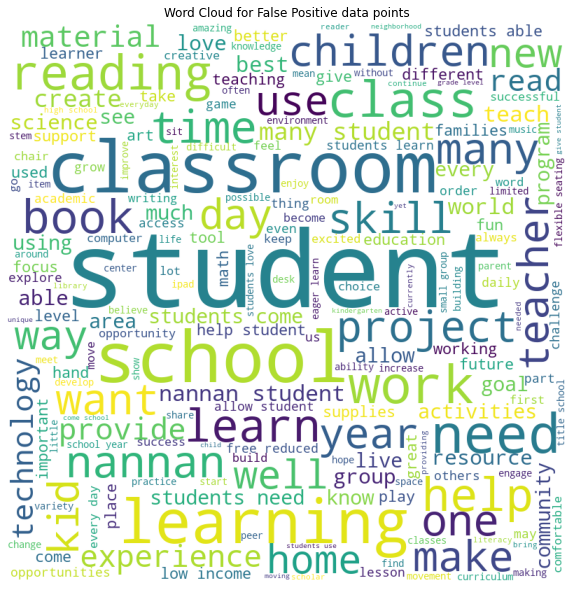

In [74]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val2 in FPS_of_dt_WordCloud['essay']:
      
    # typecaste each val to string
    val2 = str(val2)
  
    # split the value
    tokens2 = val2.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens2)):
        tokens2[i] = tokens2[i].lower()
      
    comment_words += " ".join(tokens2)+" "
  
wordclouddt = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordclouddt)
plt.title('Word Cloud for False Positive data points')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### **Box Plot**

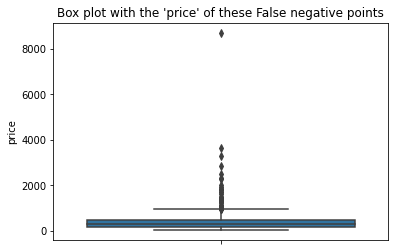

<Figure size 576x576 with 0 Axes>

In [75]:
sns.boxplot(y='price',data=FPS_of_dt_WordCloud)
plt.title("Box plot with the \'price\' of these False negative points")
plt.figure(figsize = (8, 8), facecolor = None)
plt.show()

### **PDF**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



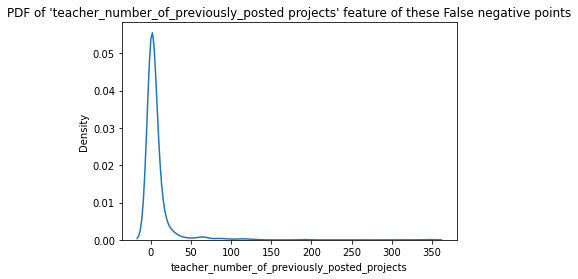

In [76]:
sns.distplot(a=FPS_of_dt_WordCloud['teacher_number_of_previously_posted_projects'],kde=True,hist=False)
plt.title('PDF of \'teacher_number_of_previously_posted projects\' feature of these False negative points')
plt.show()

# **Summarizing the results**

In [83]:
from prettytable import PrettyTable
PT=PrettyTable()
PT.field_names=['Vectorizer','Model','max_depth,min_samples_split(Hyperparameters)','AUC Scores']
PT.add_row(['Tfidf','Decision Trees',str(gridsearch.best_params_['max_depth'])+","+str(gridsearch.best_params_['min_samples_split']),auc(test_fpr_val, test_tpr_val)])
PT.add_row(['Tfidf_W2V','Decision Trees',str(gridsearch1.best_params_['max_depth'])+","+str(gridsearch1.best_params_['min_samples_split']),auc(test_fpr_val1,test_tpr_val1)])
PT.add_row(['Tfidf on Task-2','Decision Trees',str(gridsearch2.best_params_['max_depth'])+","+str(gridsearch2.best_params_['min_samples_split']),auc(dt_test_fpr_val,dt_test_tpr_val)])
print(PT)

+-----------------+----------------+----------------------------------------------+--------------------+
|    Vectorizer   |     Model      | max_depth,min_samples_split(Hyperparameters) |     AUC Scores     |
+-----------------+----------------+----------------------------------------------+--------------------+
|      Tfidf      | Decision Trees |                    10,500                    | 0.6259794989127153 |
|    Tfidf_W2V    | Decision Trees |                    5,500                     | 0.6137127133379476 |
| Tfidf on Task-2 | Decision Trees |                    10,500                    | 0.6237923612898505 |
+-----------------+----------------+----------------------------------------------+--------------------+
